In [0]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [0]:
learn_rate = 0.005 # learning rate on backward propagation
batch_size = 100 # batch size 
epoch = 25 # number of re-runs of each batch 


In [0]:
(x_train, y_train),(x_test,y_test) = mnist.load_data() # load MNIST dataset into training and test sets.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28*28) # data reshape before normalization
y_train = keras.utils.to_categorical(y_train, 10) # convert to categorical data instead of numerical data

In [0]:
x_test = x_test.reshape(x_test.shape[0],28*28) # data reshape before normalization
temp = y_test # saving original y values for final check
y_test = keras.utils.to_categorical(y_test,10) # convert to categorical data instead of numerical data

In [0]:
x_train = x_train.astype('float32') # Define as float32 type
x_test = x_test.astype('float32') # Define as float32 type
x_train = x_train / 255 # normalization
x_test = x_test / 255 # normalization

In [0]:
# logistic regression function step 1
def forward_prop(w,b,x):
  op = np.dot(w,np.transpose(x)) + b
  return sigmoid(op)

In [0]:
# logistic regression function step 2
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
# binary-cross entropy function
def loss_func(y_train,op):
  return np.sum(np.multiply(np.transpose(y_train), np.log(op)) + np.multiply(np.transpose(y_train), np.log(op)), axis = 1, keepdims = True)/batch_size

In [0]:
# Backward Progation based on set learning rate to calculate better weights and bias values
def backward_prop(x_train, y_train, op, w, b, learn_rate):
  d_loss = op - np.transpose(y_train)
  d_z = d_loss
  d_w = np.dot(d_z, x_train)
  d_b = np.sum(d_z, axis = 1, keepdims = True)
  w = w - learn_rate * d_w
  b = b - learn_rate * d_b
  return w,b

In [23]:
# initialization of random weights and bias values.
np.random.seed(1) # same seed for random functions used so keep the the pseudo random numbers similar. 
w = np.random.randn(10,784)*0.01
b = np.random.randn(10,1)
arr = []
for k in range(epoch):
  for i in range(0, x_train.shape[0], batch_size):
    op = forward_prop(w, b, x_train[i : i + batch_size]) # Training model with logistic regression
    w,b = backward_prop(x_train[i : i + batch_size], y_train[i : i + batch_size], op, w, b, learn_rate)
  output = forward_prop(w, b, x_test)
  output = np.transpose(output)
  output_list = list()
  for j in range(10000):
    output_list.append(np.argmax(output[j]))
  counter = 0
  for m in range(10000):
    if output_list[m] == temp[m]:
      counter += 1
  output_list = []
  print('epoch: ', k)
  print(counter, '/10000')
  print('accuracy: ', counter/100)
  arr.append(counter/100)

epoch:  0
9024 /10000
accuracy:  90.24
epoch:  1
9066 /10000
accuracy:  90.66
epoch:  2
9093 /10000
accuracy:  90.93
epoch:  3
9101 /10000
accuracy:  91.01
epoch:  4
9098 /10000
accuracy:  90.98
epoch:  5
9100 /10000
accuracy:  91.0
epoch:  6
9097 /10000
accuracy:  90.97
epoch:  7
9102 /10000
accuracy:  91.02
epoch:  8
9108 /10000
accuracy:  91.08
epoch:  9
9114 /10000
accuracy:  91.14
epoch:  10
9118 /10000
accuracy:  91.18
epoch:  11
9117 /10000
accuracy:  91.17
epoch:  12
9123 /10000
accuracy:  91.23
epoch:  13
9129 /10000
accuracy:  91.29
epoch:  14
9128 /10000
accuracy:  91.28
epoch:  15
9130 /10000
accuracy:  91.3
epoch:  16
9129 /10000
accuracy:  91.29
epoch:  17
9134 /10000
accuracy:  91.34
epoch:  18
9133 /10000
accuracy:  91.33
epoch:  19
9133 /10000
accuracy:  91.33
epoch:  20
9134 /10000
accuracy:  91.34
epoch:  21
9135 /10000
accuracy:  91.35
epoch:  22
9137 /10000
accuracy:  91.37
epoch:  23
9137 /10000
accuracy:  91.37
epoch:  24
9136 /10000
accuracy:  91.36


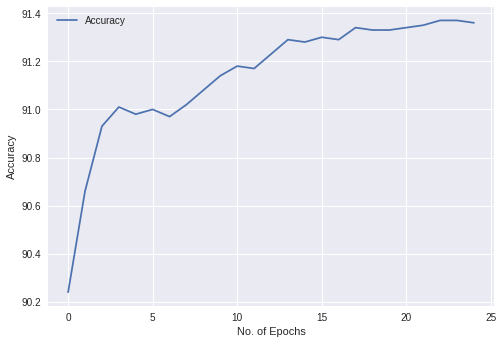

In [24]:
# Plotting the graph to visualize increase in accuracy of the model over the epochs
plt.plot(arr, label = 'Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()